In [1]:
import numpy as np
import operator
from operator import itemgetter
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt

In [2]:
# x1 and x2 are two vectors of different images
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [8]:
class KNN:
    # constructor for initializing k
    def __init__(self, k=3):
        self.k = k

    # save training data and labels
    def fit(self, x_train, y_train):
        self.x_train = x_train # training data
        self.y_train = y_train # training labels

    # performing prediction
    def predict(self, x_test):
        predictions = []
        for i in range(len(x_test)):
            # calculating distance of test data[i] from all training data
            dist = np.array([euclidean_distance(x_test[i], x) for x in self.x_train])
            # sort the distnaces and return first k neighbors
            dist_sorted = dist.argsort()[:self.k]
            # set neighbour count to empty set
            neigh_count = {}
            for idx in dist_sorted:
                # if exist in set, increment frequency
                if self.y_train[idx] in neigh_count:
                    neigh_count[self.y_train[idx]] += 1
                else:
                    # if not exist in set, add to set with frequency 1
                    neigh_count[self.y_train[idx]] = 1
            # sort the neighbour count in descending order and return the first one
            # which is the most frequent label in the k neighbours
            sorted_neigh_count = sorted(neigh_count.items(), key=itemgetter(1), reverse=True)
            predictions.append(sorted_neigh_count[0][0])
        return predictions

In [9]:
# loading mnist dataset
mnist = load_digits()
print(mnist.data.shape)

X = mnist.data
y = mnist.target

(1797, 64)


In [10]:
# splitting data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [11]:
# find the best k-value by training for k in the range 1 to 100
kVals = np.arange(3, 100, 2)
accuracies = []
for k in kVals:
    model = KNN(k=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f"k={k}, accuracy={accuracy:.4f}")

k=3, accuracy=0.9756
k=5, accuracy=0.9756
k=7, accuracy=0.9756
k=9, accuracy=0.9756
k=11, accuracy=0.9733
k=13, accuracy=0.9711
k=15, accuracy=0.9689
k=17, accuracy=0.9667
k=19, accuracy=0.9667
k=21, accuracy=0.9667
k=23, accuracy=0.9644
k=25, accuracy=0.9644
k=27, accuracy=0.9644
k=29, accuracy=0.9622
k=31, accuracy=0.9600
k=33, accuracy=0.9600
k=35, accuracy=0.9578
k=37, accuracy=0.9578
k=39, accuracy=0.9578
k=41, accuracy=0.9533
k=43, accuracy=0.9511
k=45, accuracy=0.9489
k=47, accuracy=0.9444
k=49, accuracy=0.9444
k=51, accuracy=0.9378
k=53, accuracy=0.9356
k=55, accuracy=0.9333
k=57, accuracy=0.9333
k=59, accuracy=0.9311
k=61, accuracy=0.9333
k=63, accuracy=0.9333
k=65, accuracy=0.9311
k=67, accuracy=0.9289
k=69, accuracy=0.9267
k=71, accuracy=0.9289
k=73, accuracy=0.9311
k=75, accuracy=0.9289
k=77, accuracy=0.9267
k=79, accuracy=0.9200
k=81, accuracy=0.9222
k=83, accuracy=0.9222
k=85, accuracy=0.9200
k=87, accuracy=0.9178
k=89, accuracy=0.9178
k=91, accuracy=0.9111
k=93, accuracy

In [12]:
# find the index where k = max
max_index = accuracies.index(max(accuracies))
print(f"Best k value is {kVals[max_index]} with accuracy {max(accuracies):.4f}")

Best k value is 3 with accuracy 0.9756


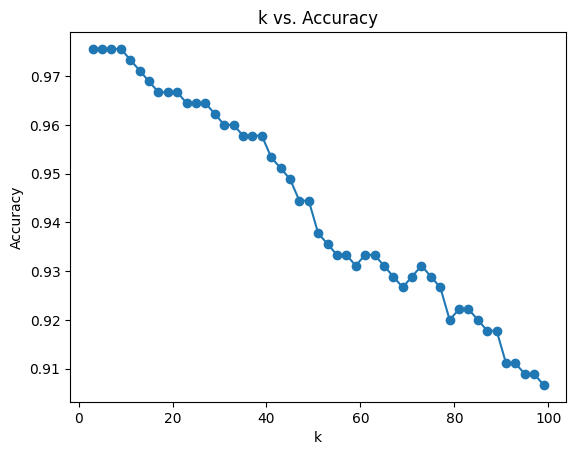

In [13]:
# plot k values and their accuracies
plt.plot(kVals, accuracies, marker='o')
plt.title("k vs. Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

In [14]:
# print precision-recall for best k-value = 3
model = KNN(k=kVals[max_index])	
model.fit(X_train, y_train)
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

print(f"Testing Accuracy: {acc:.4f}")


Precision: [1.         0.89361702 1.         0.93023256 0.98113208 1.
 1.         1.         1.         0.95      ]
Recall: [1.         1.         0.97560976 1.         1.         0.95833333
 1.         1.         0.91111111 0.9047619 ]
F1 Score: [1.         0.94382022 0.98765432 0.96385542 0.99047619 0.9787234
 1.         1.         0.95348837 0.92682927]
Testing Accuracy: 0.9756
